In [4]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/EDA.jpg',width=600,height=600)

In [5]:
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png',width=900,height=300)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'

df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
## only notebook local
#!pip install jupyter-summarytools -q

from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,sepal length[float64],Mean (sd) : 5.8 (0.8)min < med < max:4.3 < 5.8 < 7.9IQR (CV) : 1.3 (7.1),35 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dTYriQBiA4a/GVqJCggi68wIDs3DpIeawc4RZeAJv4E6QEDHTwZhkVg09je1PVTLWV/0++/wsXuRLUl1tmqYRwHffnn0DwD1enn0DXTHGDEVk4HCKU9M0r23dD9wEGaoxZjidTn/GcTyxPcfhcEiNMb+I1Q9BhioigziOJ6vV6jVJkuLRg7Msi9br9WS/3w9EhFA9EGqoIiKSJEkxm83+WB4+tL2u49jByHFB0KE+g+vYwchxGaG2z3rsYOT4HKF2xGHssB45QsZ7VKhAqFCBUKFCpzMqX4fQls5C5esQ2tTlLypfh9Cazl9PPevrEMLCwxRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVGDhtGeqquqLSGyMsT1FkAt5CNUjeZ73y7L8sVgser1e7+H1ESLhLuQhVI+cTqeXKIpGy+WymM/n6aPHh7yQh1A9NB6PWcjzAaF+wmFWjOu67ndwS18aoV7gMiuWZRlVVfW9KIrfImL7q4gPCPUCl1lxu91ONpvN6Hw+97q6v6+IUK+wmRXTNA1yRnw2XvhDBa9/UXmgwRtvQ+WBBu95GyoPNHjP21Df8EADER6moAShQgVChQqEChUIFSoQKlQgVKhAqFCBUKHCzS9TDtubszAErbkaqsv25iwMQZtu/aJab2/OwhC06a5FKTbbm7MwBG3iYQoqECpUIFSo4P3CaTzGcZM1pw3WHP9T49VrE2pAXDdZc9lgzfU/Nd66NqEGxOXvzFrYYM36VeY91ybUANluslZVVSz2Y0Nc13U/SZLUcoO3q68zCRUi4j42dP0lklAhIu57s3b9JZJQ8Q/bsaHrL5G8R4UKhAoVCBUqECpUIFSoQKhQgVChAqFChbte+GdZFj164uPxGImI5Hke7Xa70f88Xuu1td636/H39PUXZ5y8xRUXT9kAAAAASUVORK5CYII="">",0(0.0%)
2,sepal width[float64],Mean (sd) : 3.1 (0.4)min < med < max:2.0 < 3.0 < 4.4IQR (CV) : 0.5 (7.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACw0lEQVR4nO3dvY7aQBRA4TuwIPMjWwgFOpqUkVJQ8hB52DxCCp6AIk0qOiRkgXAWYWxSpIrCAp4Z78415+tHuDjCGI+vzeVyESB0rY8+AOARLx99AKEyxvREpGu5/HS5XF59Hs+zI9QrjDG98Xj8LY7jkc36/X6fGmO+E6s/hHpdN47j0WKxeE2S5Fhl4W63i5bL5Wi73XZFhFA9IdQbkiQ5TiaT3xZLe94P5slxMQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFbgzVYOiKDoiEhtjbJazoeUKQvUsy7JOnudfZ7NZu91uV9onIMKGlrcQqmen0+kliqL+fD4/TqfTtMpaNrS8jVBrMhgM2NDiERdTUIFQoQKhQgVChQqEChUIFSoQKlQgVKjQ2D/8HQdIxGVZdnweD9w0MlTXARJ5nkdFUXw5Ho8/RMTm7hI8a2So4jBAQkRkvV6PVqtV/3w+t+s4OFQXdKgOp++4LMtOkiSpzf32NE253x6YYEN1OX1z6m6eYEMVh9M3p+7mCTlUEbGb/8Spu3n4HxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWC3ziNahwfEw92LDuhNojrY+Ihj2Un1Gaxfs4s9LHshBoYxzeqOD0mLgGPZSfUgLi+UaXJj4kTakBc3qgi0uzHxAk1QLZvVGnyY+K1hspEPfhSW6hM1INPdX6jMlEP3tT+G9VmJI9Is39voTru9UOFu9+orjNKLdYB/7kZKjNKEYp736jMKEUQHrqYYkbpc3DcZyDy95qntFx7c4shd6YgIu77DIqi6GRZ9nk4HP5qtVp51fX3thgSKkTE2z6DT/P5/GfV9Y9sMSRU/MN1n4HtermzxfChUHe7XVT1Uw+HQyQikmVZtNls+u+5Xutnaz1u1/WP9PUHQS+f8/4UpmMAAAAASUVORK5CYII="">",0(0.0%)
3,petal length[float64],Mean (sd) : 3.8 (1.8)min < med < max:1.0 < 4.3 < 6.9IQR (CV) : 3.5 (2.1),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3dTYriQBjG8afGD6JCRATdeYGBWbj0EHPYOcIsPIE3cCeIRMy0qNHZDQzT02pVYtdb/H/rrhjohyTvm6qKu91uAmL35bNPAHhE+94fOOd6krqexz/dbrc3z7HAHx8G1TnXG4/H3/M8H/kcfL/f75xzPwgrQt27onbzPB8tFou34XB4fObARVFky+VytN1uu5IIKoLcvfVL0nA4PE4mk18ex+95jAH+QTEFEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIEggoTCCpMIKgw4aF3/XidwGmVUqJTKwlqREKnVUrpTq0kqHHxnlYppT21kqBGKGBapZTo1EqKKZjAFbUBAQVRfr1eO3WfTwoIas1CCqLz+ZxVVfX1eDz+lOR7608SQa2fd0G0Xq9Hq9Wqf7lcWk2dnFUEtSE+BdFut0uyEKoDxRRMIKgwgaDCBIIKEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIE3vUnpqqqjqTcOeczPNr1VgQ1IWVZds7n87fZbNZqtVpPL2WJeb0VQU3I6XRqZ1nWn8/nx+l0untmbOzrrQhqggaDQXJb2VNMwQSCChMIKkwgqDCBoMKERqv+wOazFHEDGq/VWFBDm89S3A1ovFZjQQ1pPkvxN6DxWo03/AOaz1LEDegUxfyoxpspSIr/UY2gQlL8j2oEFX+J9VGNPipMIKgwgVv/f7AZb1wI6jvYjDc+BPV9bMYbGYL6ATbjjQfFFEzgioraNLlUm6CiFk0v1SaoqEXTS7UJKmrV1FLtZIMa+DlxmvaRSTKooZ8Tp2kfnySDqsDPidO0j0+qQZXk/zlxmvbxoeEPEx66ohZFkT174MPhkElSWZbZZrPpPzu+KIqsqqq2/BrI+fV6bfuctxR27p811vJvP/J/+g3LcowOEmBq9gAAAABJRU5ErkJggg=="">",0(0.0%)
4,petal width[float64],Mean (sd) : 1.2 (0.8)min < med < max:0.1 < 1.3 < 2.5IQ

In [13]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

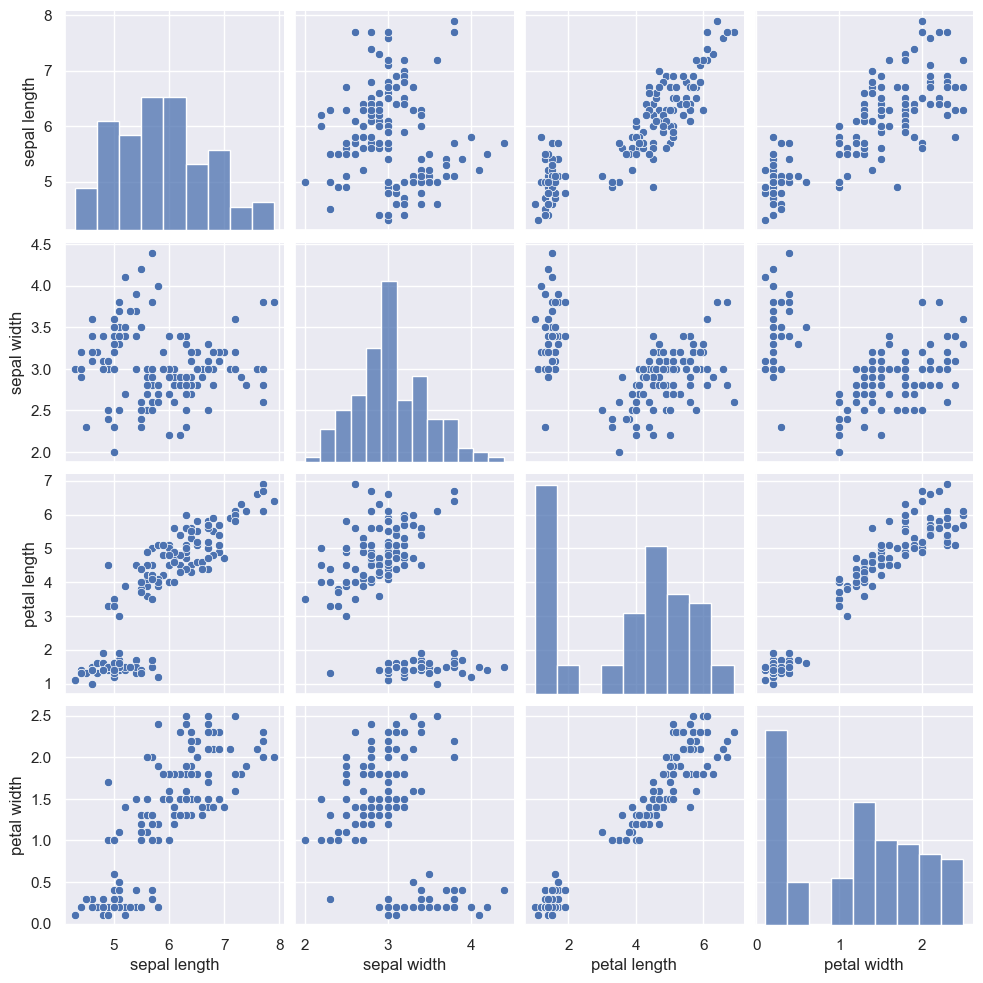

In [14]:
sns.pairplot(df);

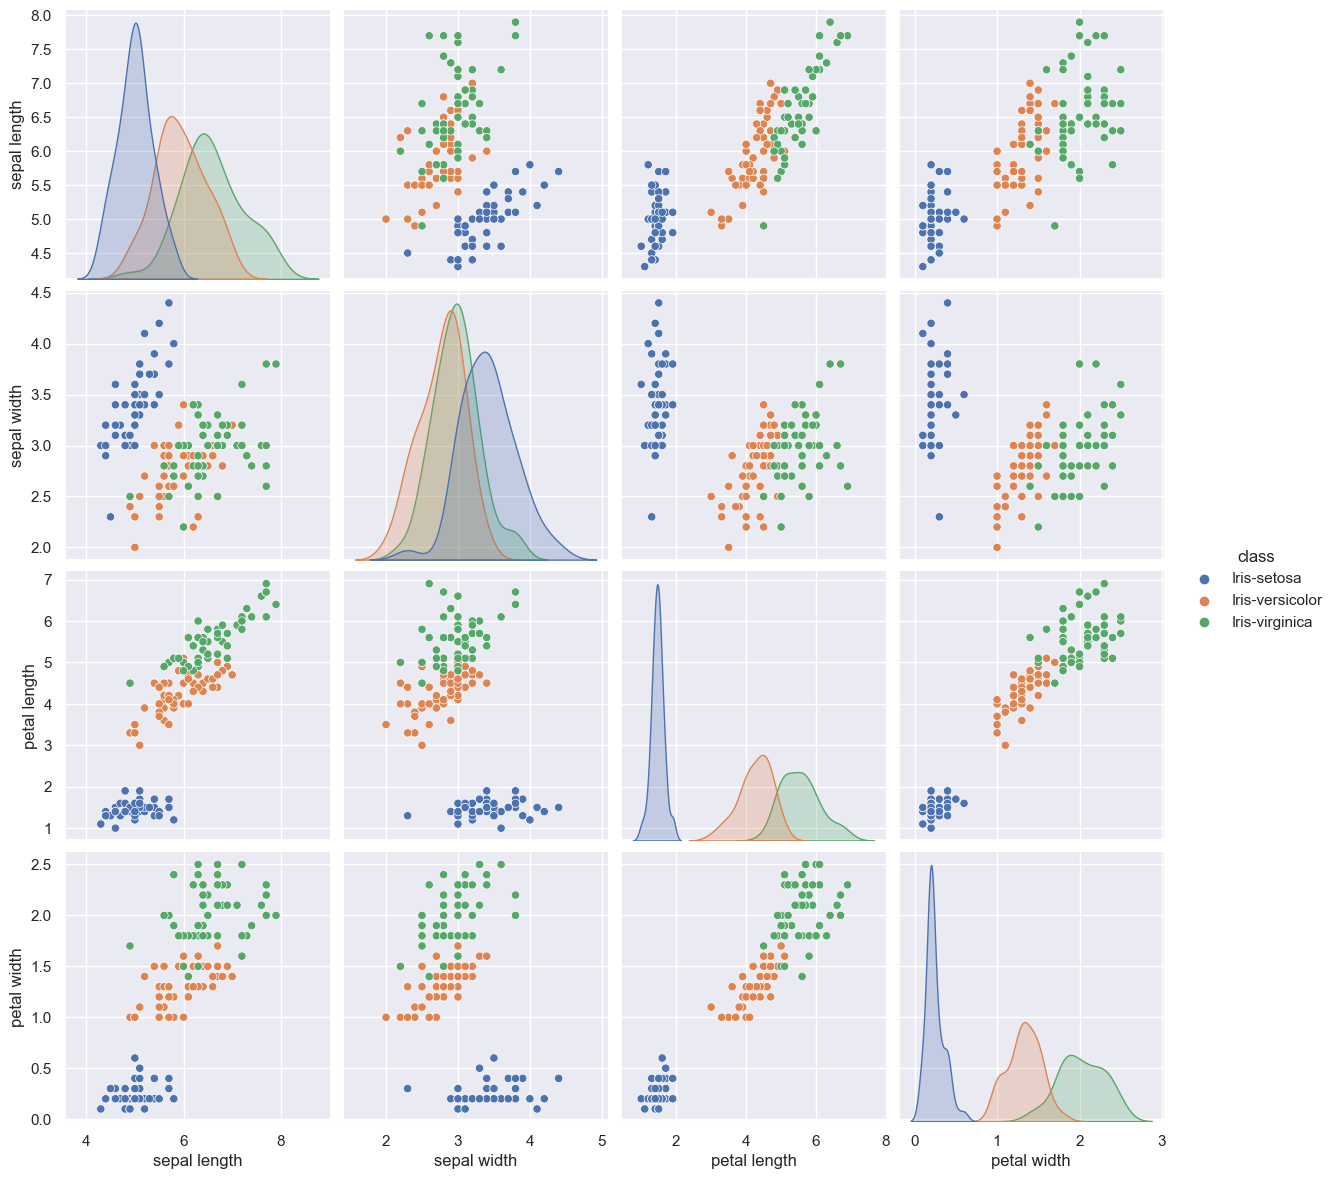

In [15]:
sns.pairplot(df, hue='class', height=3, aspect=1);

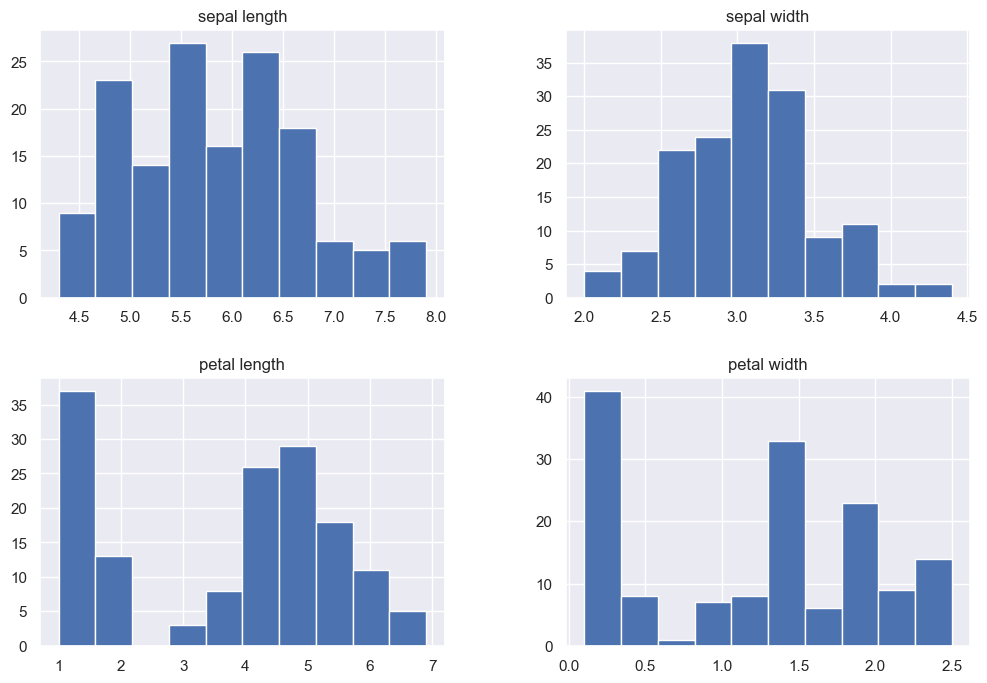

In [16]:
df.hist(figsize=(12,8));

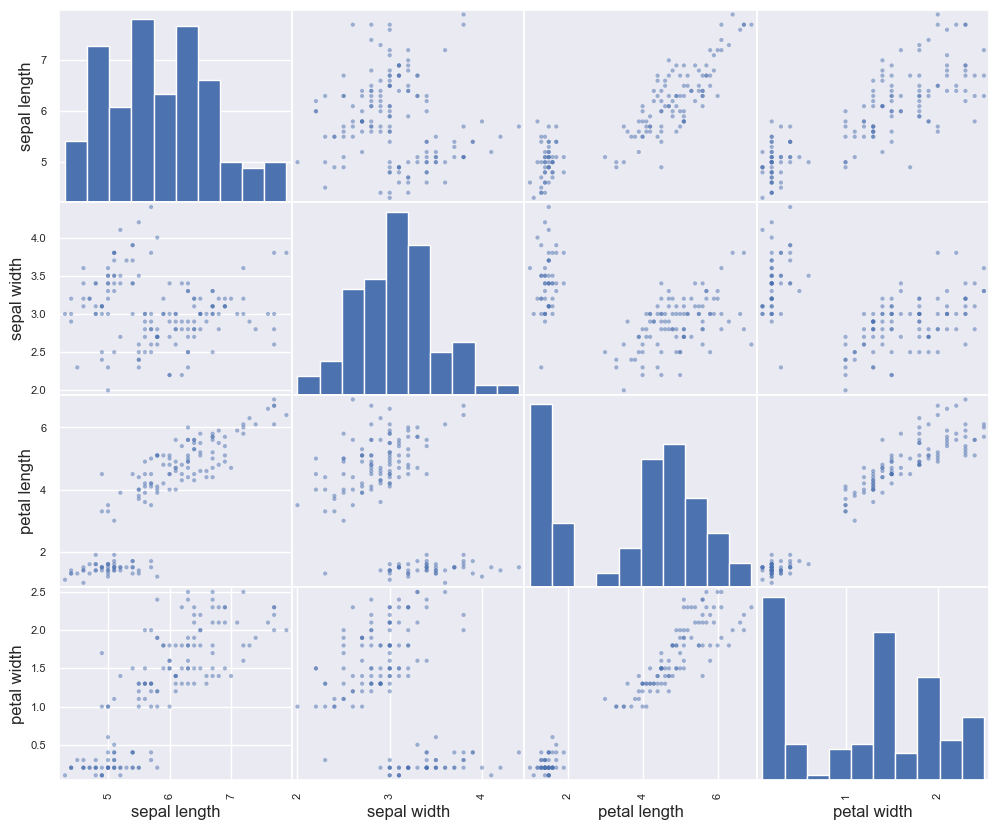

In [17]:
pd.plotting.scatter_matrix(df, figsize=(12,10));

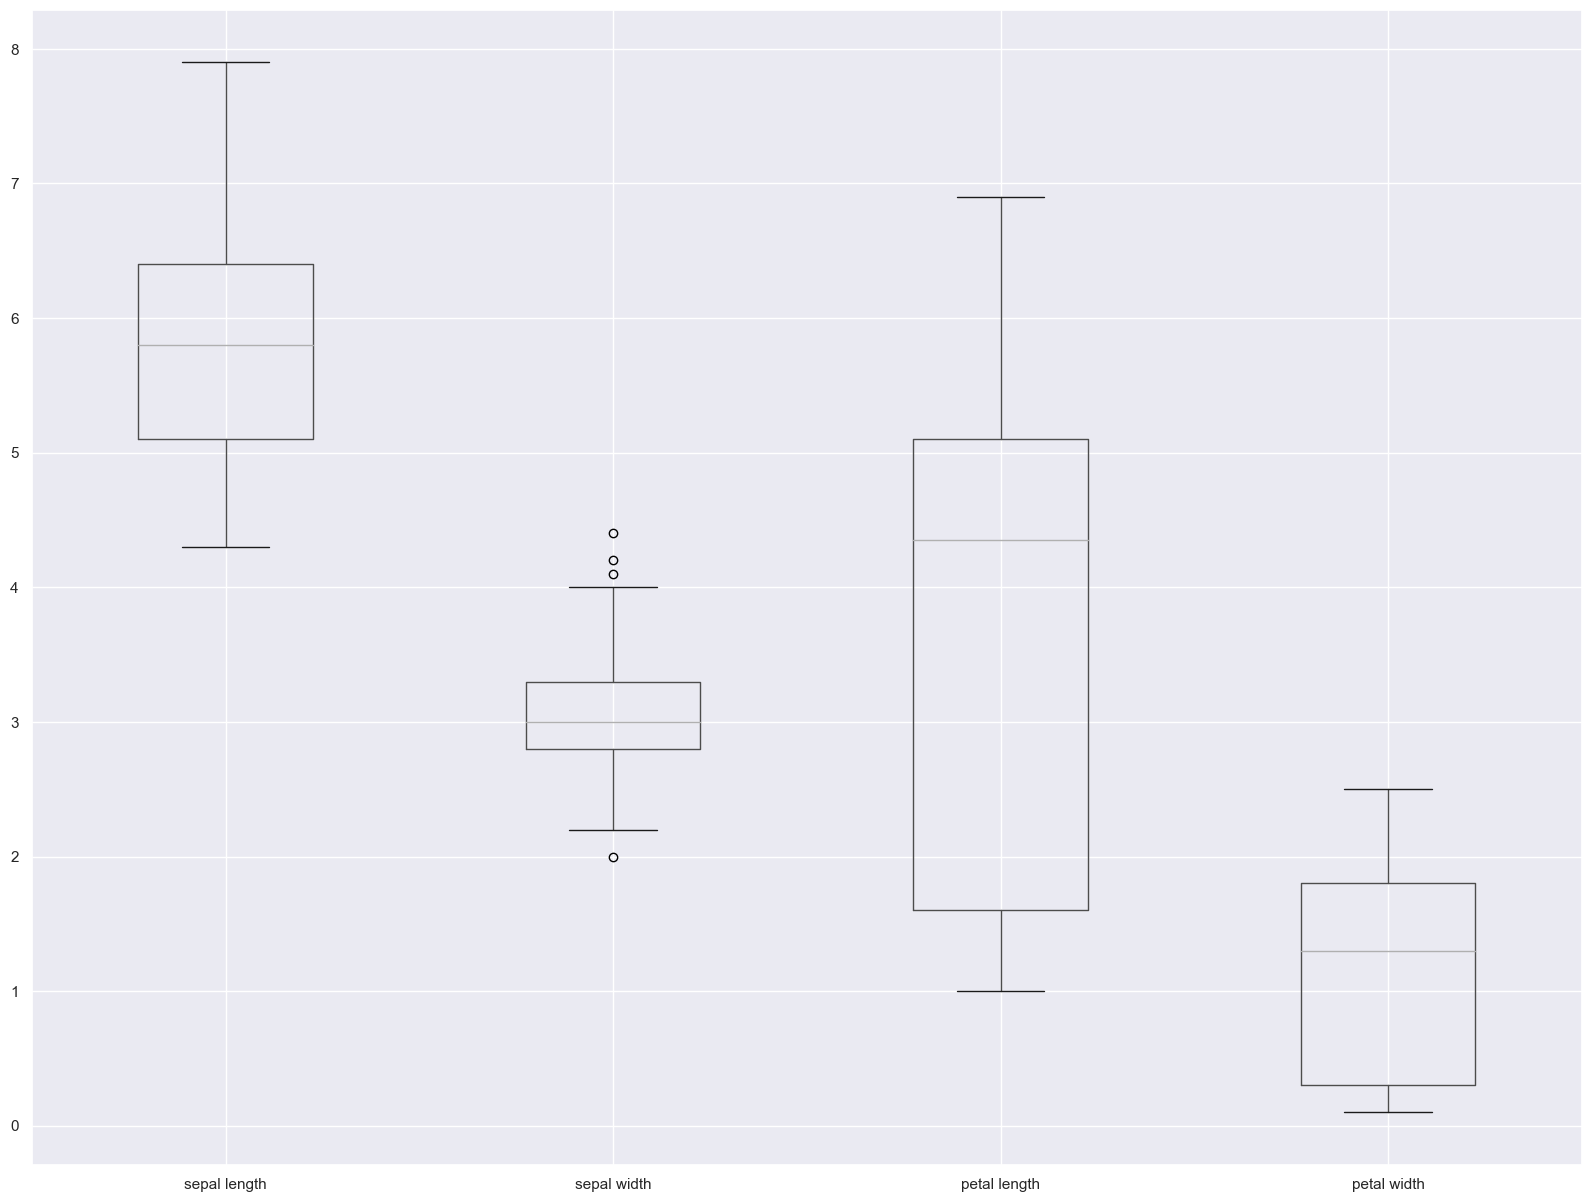

In [18]:
df.boxplot(figsize=(20,15));

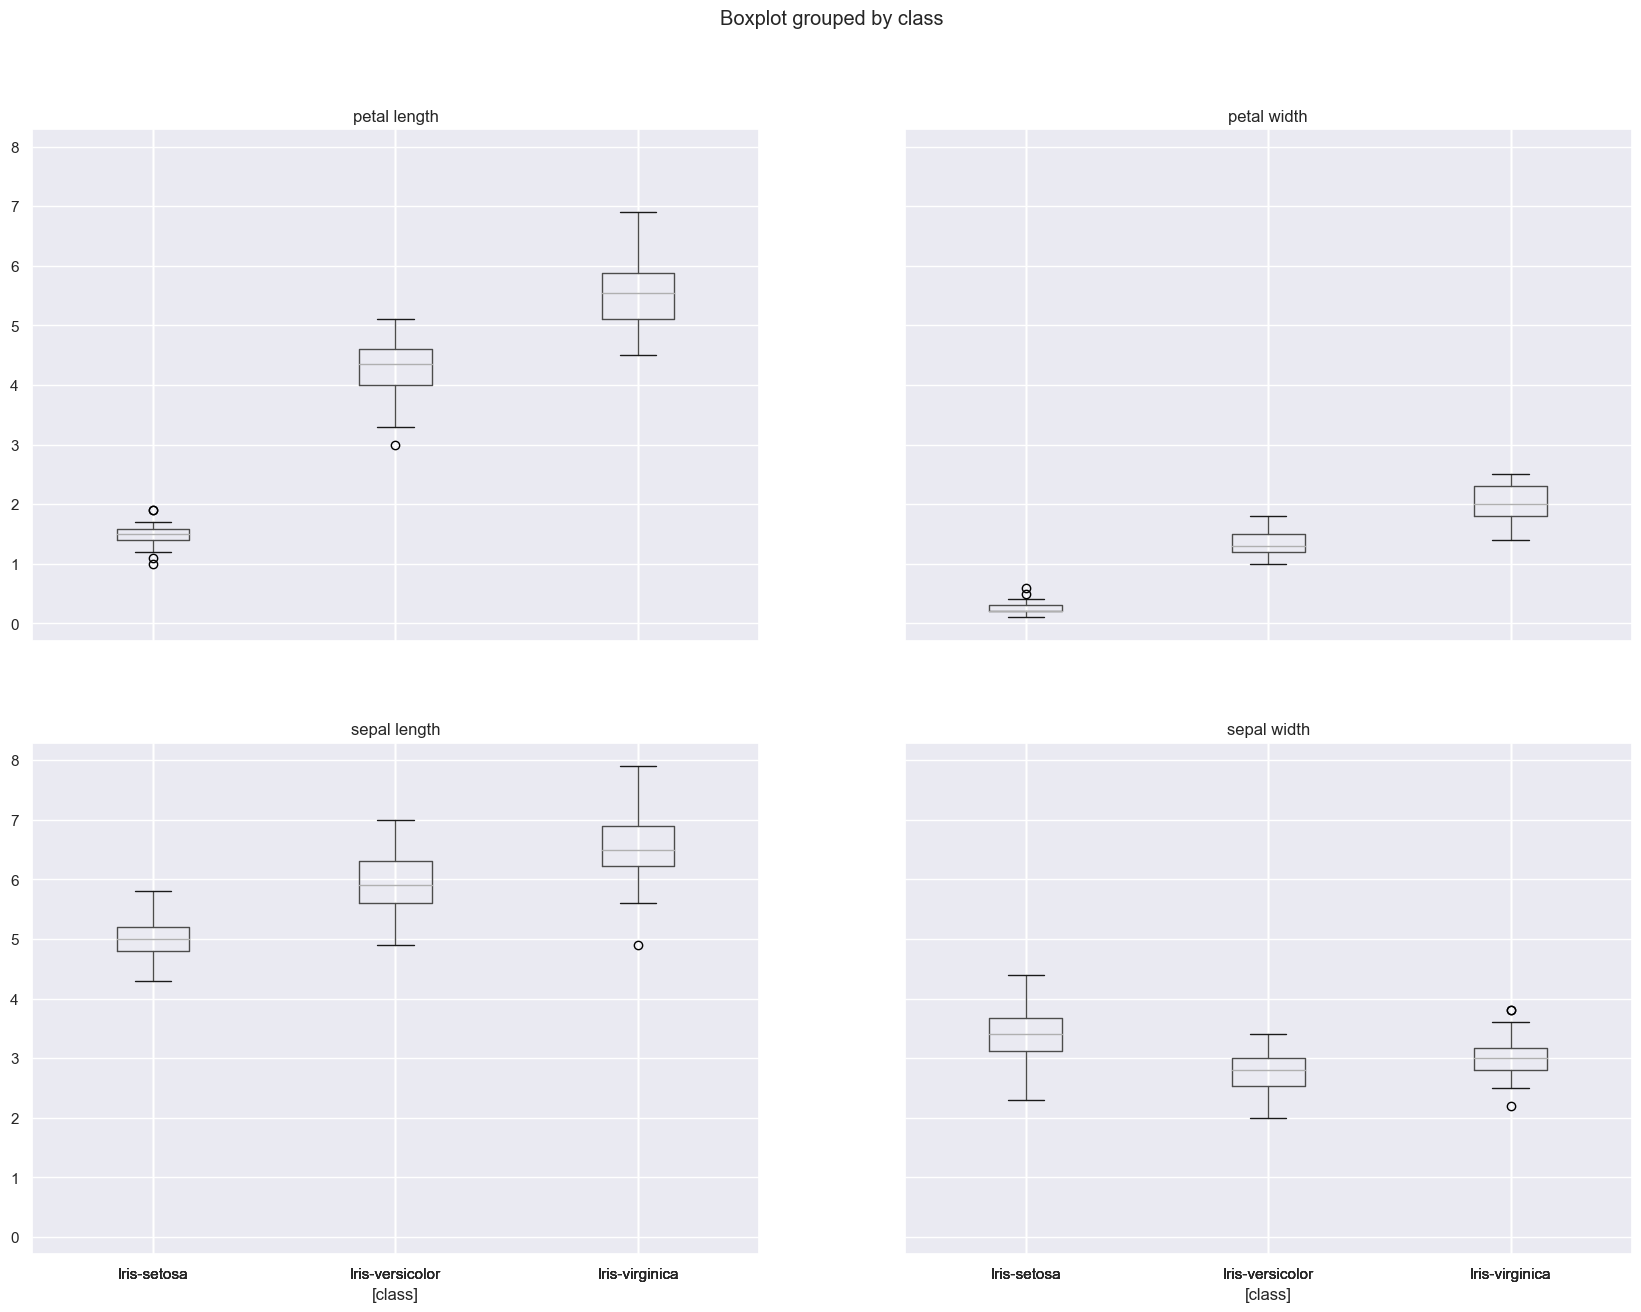

In [19]:
df.boxplot(by='class', figsize=(20,15));

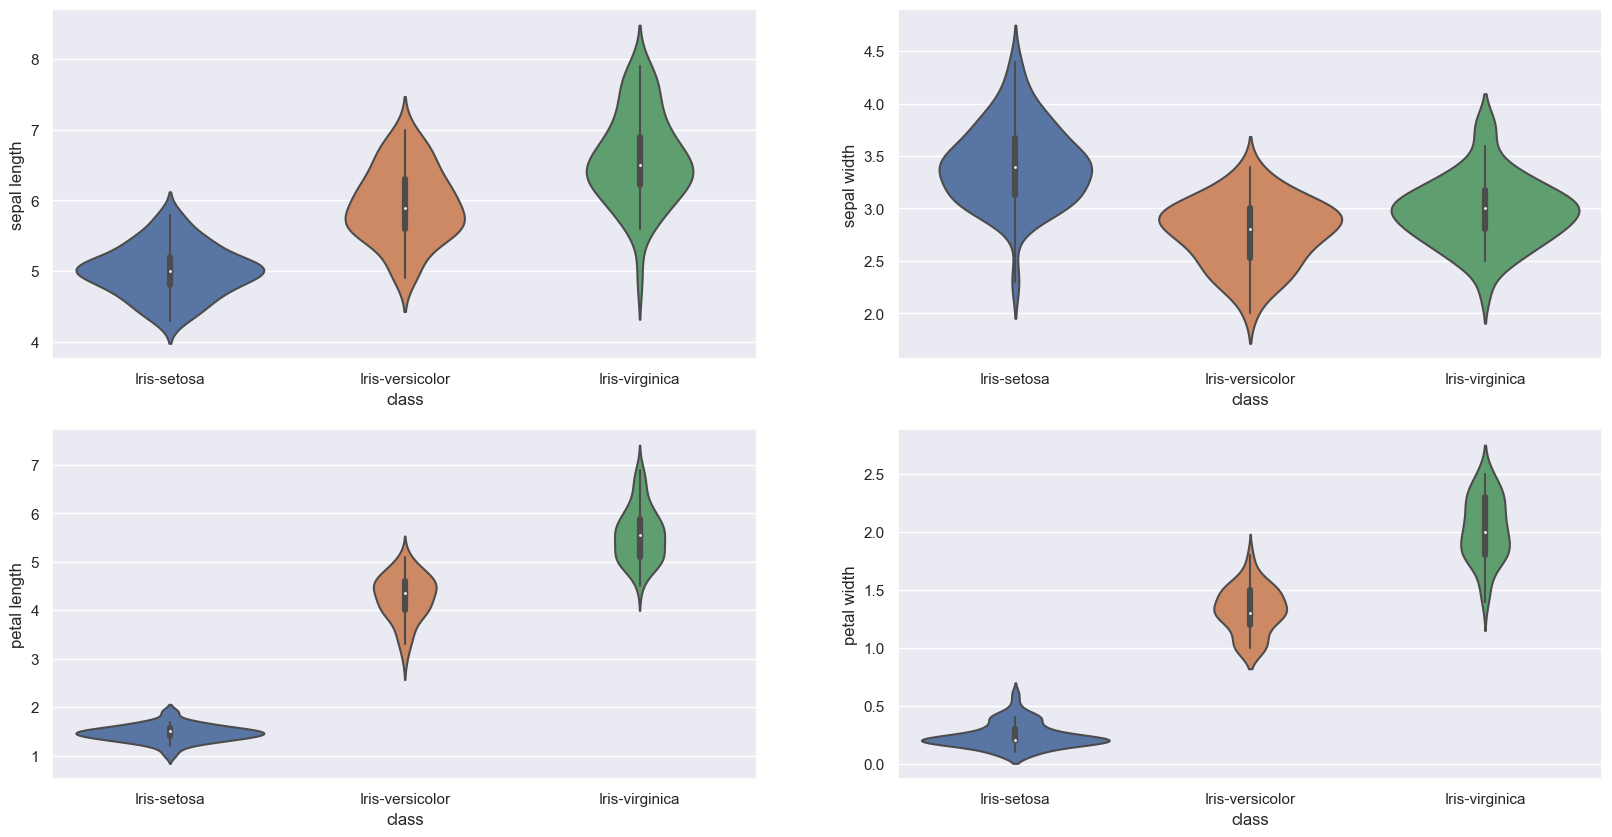

In [20]:
plt.figure(figsize=(20,10));

# subplot su matrice 2x2

plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='class', y='sepal width', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='class', y='petal length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal width', data=df);

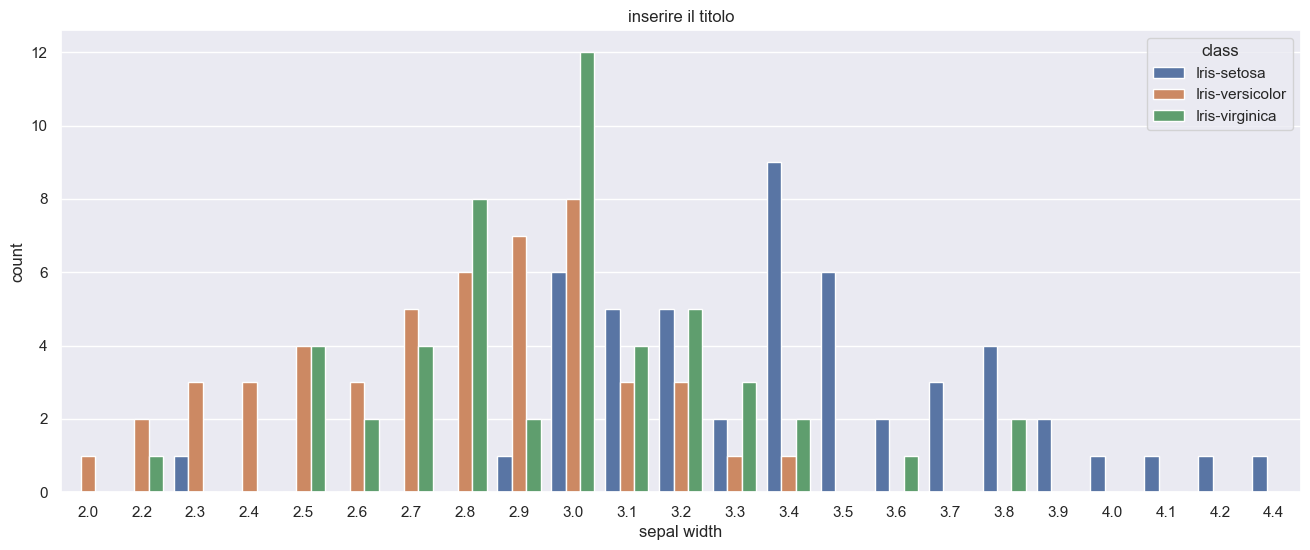

In [21]:
plt.figure(figsize=(16, 6))
plt.title('inserire il titolo')
plt.legend('class')
sns.countplot(x='sepal width',data=df,hue='class');

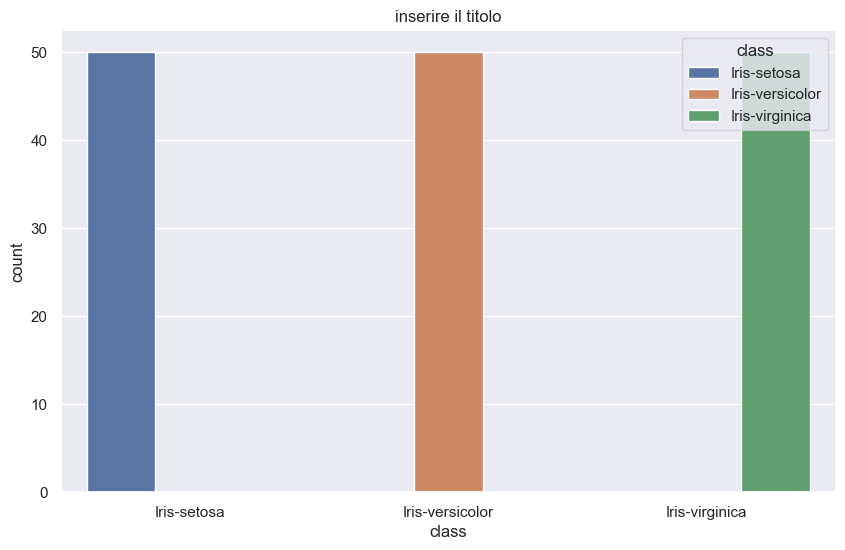

In [22]:
plt.figure(figsize=(10, 6))
plt.title('inserire il titolo')
sns.countplot(x='class', hue="class", data=df);

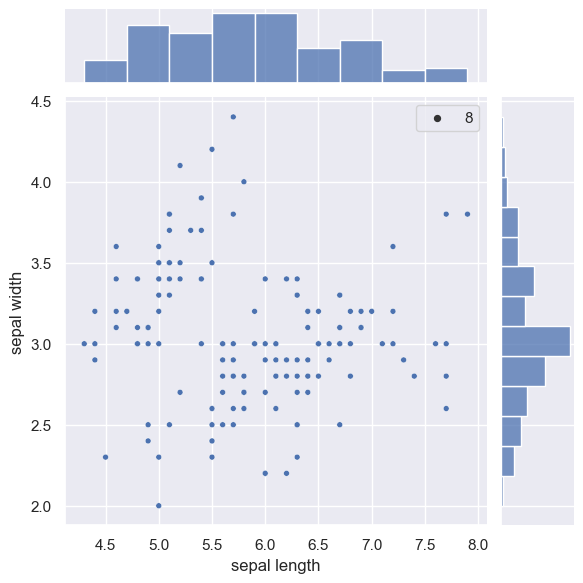

In [23]:
sns.jointplot(x="sepal length", y="sepal width", data=df, size=8);

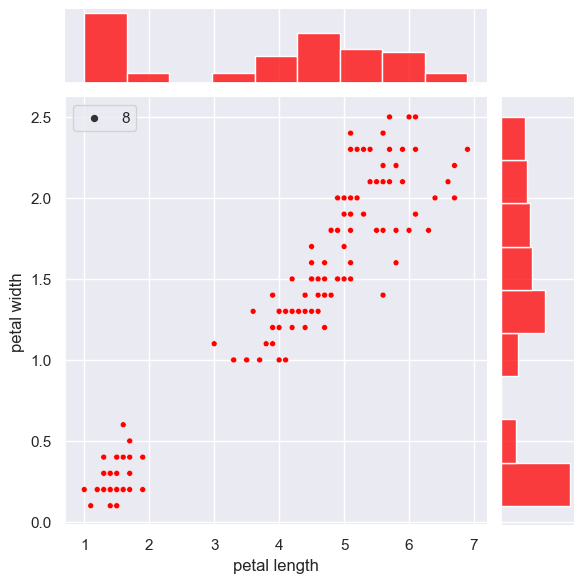

In [24]:
sns.jointplot(x="petal length", y="petal width", data=df, size=8, color='red');

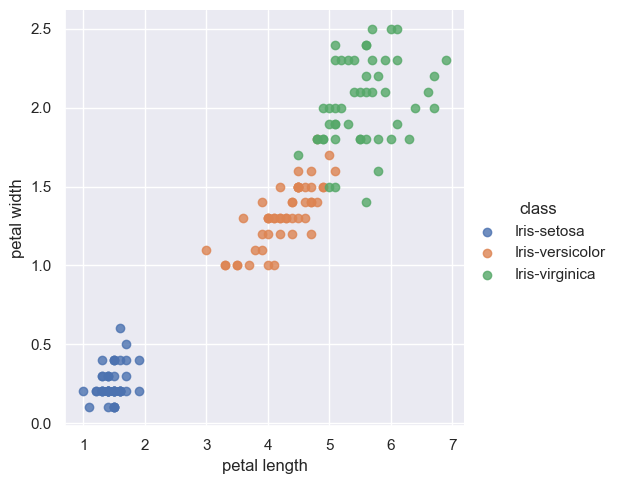

In [25]:
sns.lmplot(x="petal length", y="petal width",hue='class', data=df, fit_reg=False);

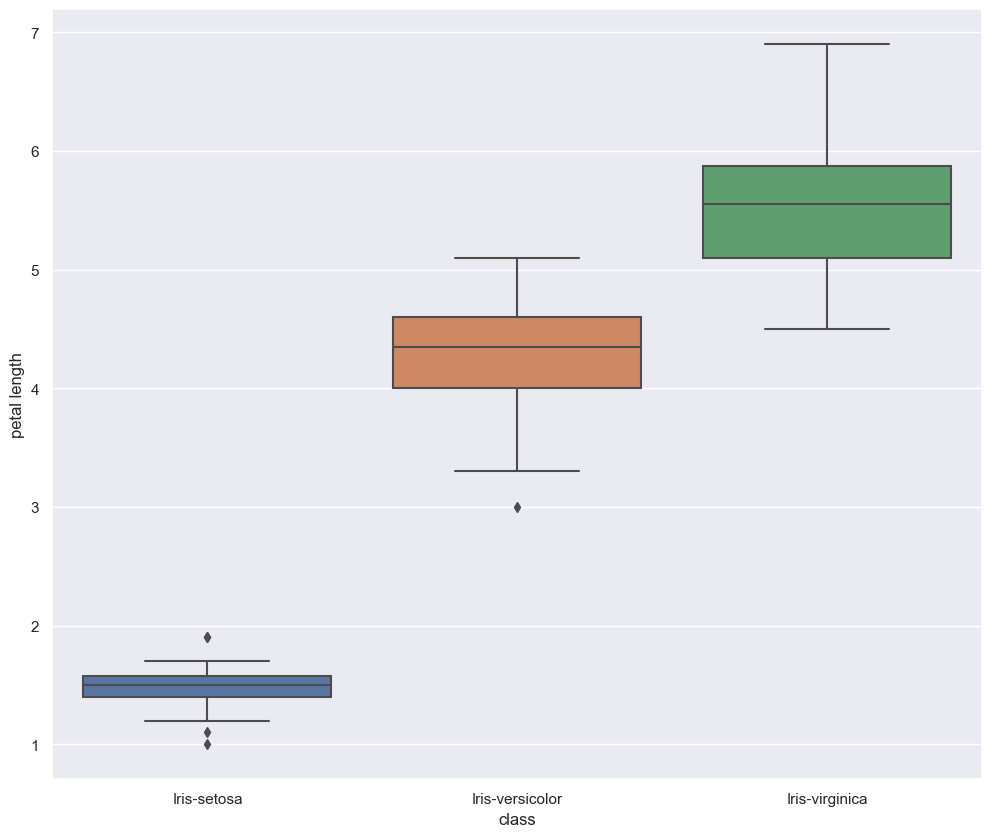

In [26]:
plt.figure(figsize=(12,10))
sns.boxplot(x="class", y="petal length", data=df);

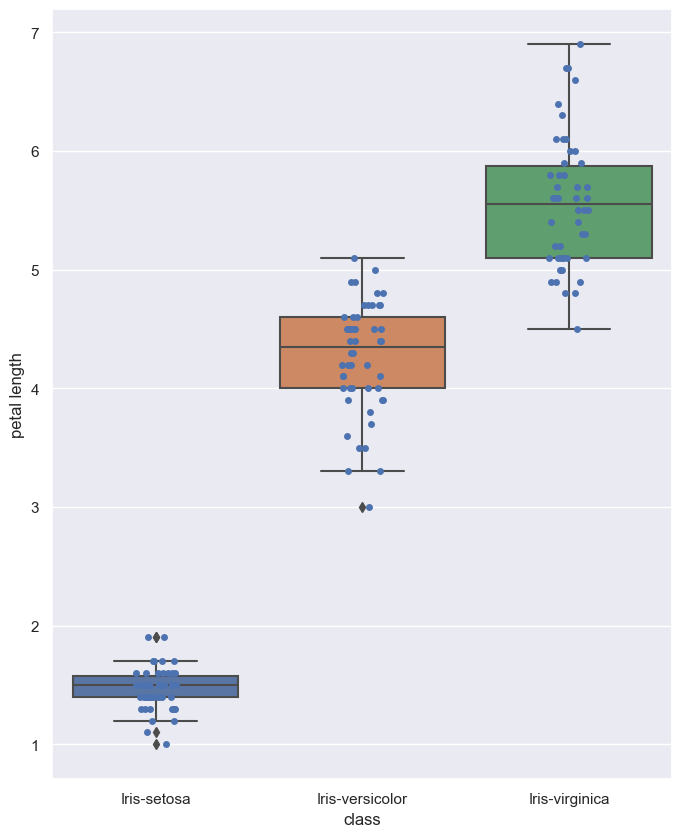

In [27]:
plt.figure(figsize=(8,10));

sns.boxplot(x="class", y="petal length", data=df);
sns.stripplot(x="class", y="petal length", data=df);

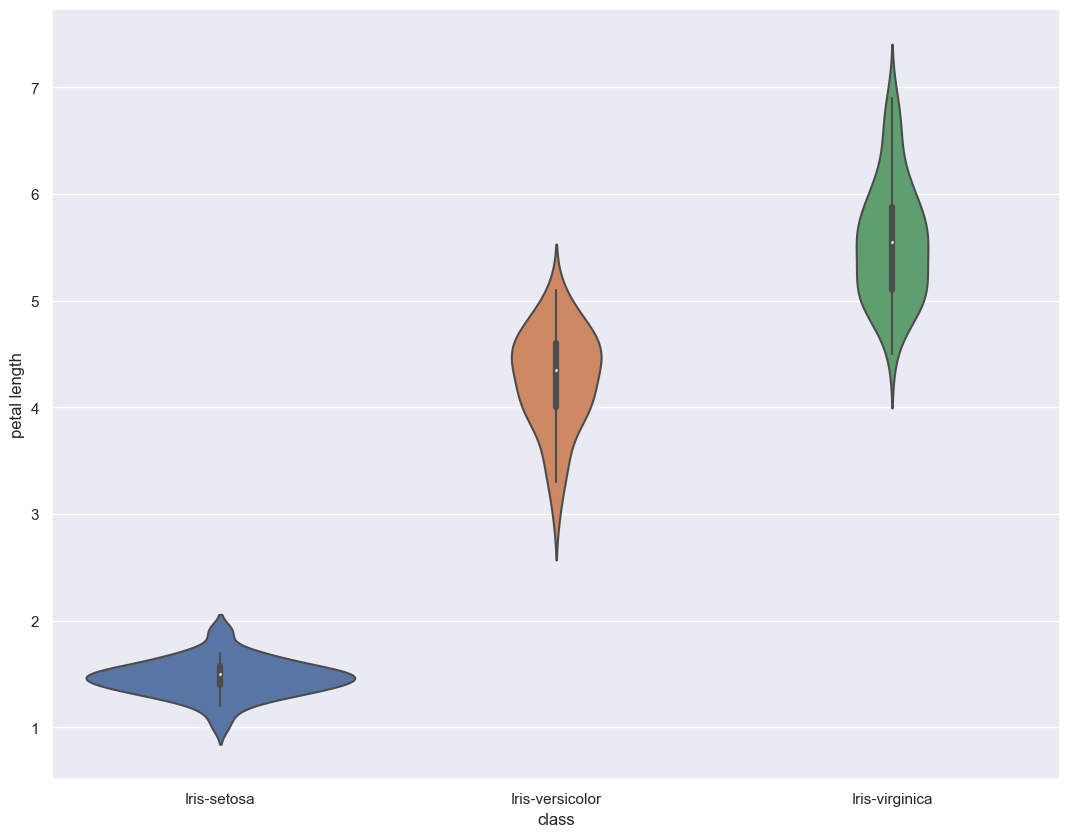

In [28]:
plt.figure(figsize=(13,10));

sns.violinplot(x="class", y="petal length", data=df);

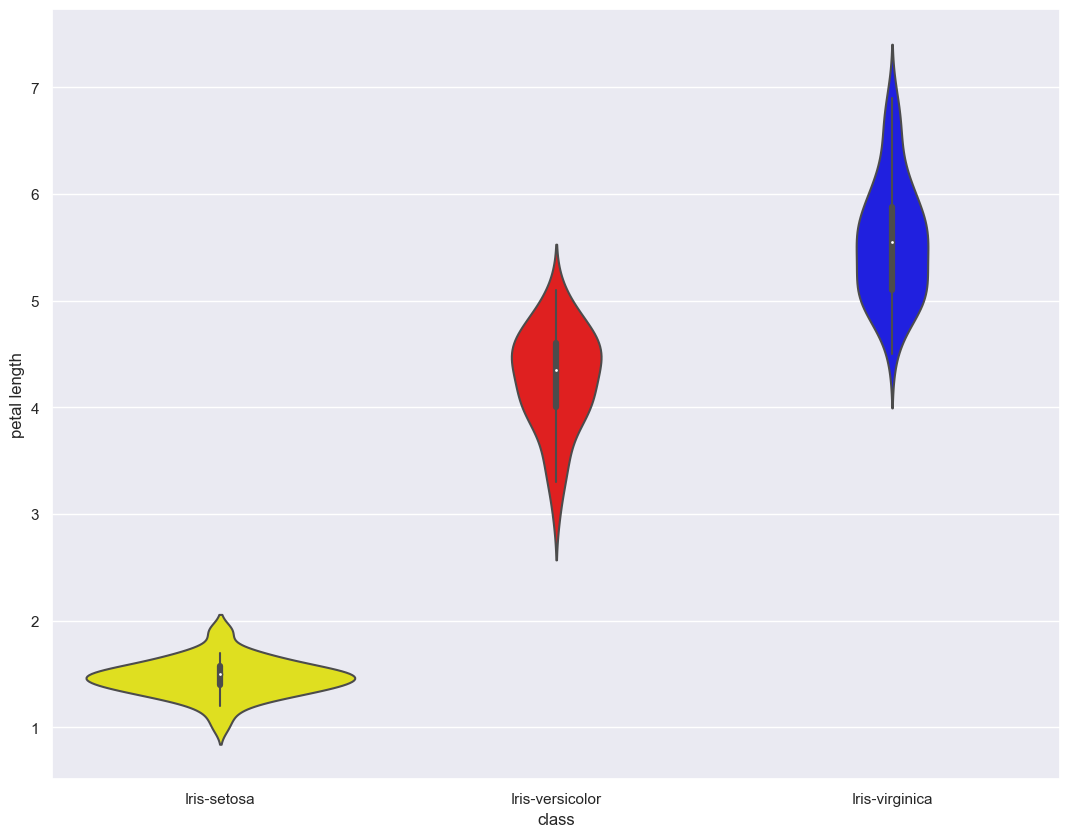

In [29]:
#palette
plt.figure(figsize=(13,10));

sns.violinplot(x="class", y="petal length",  palette={"blue","red","yellow"}, data=df);

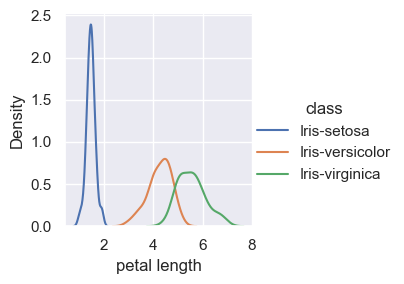

In [30]:
sns.FacetGrid(df, hue="class") \
   .map(sns.kdeplot, "petal length") \
   .add_legend()

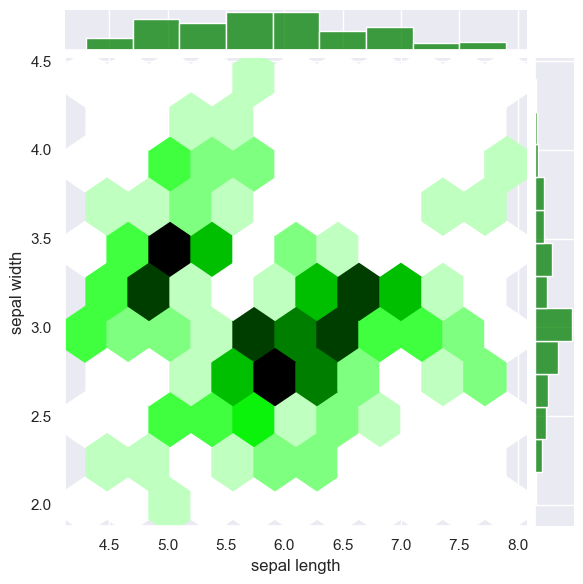

In [32]:
sns.jointplot(x="sepal length", y="sepal width", data=df,ratio=10, kind='hex',color='green')

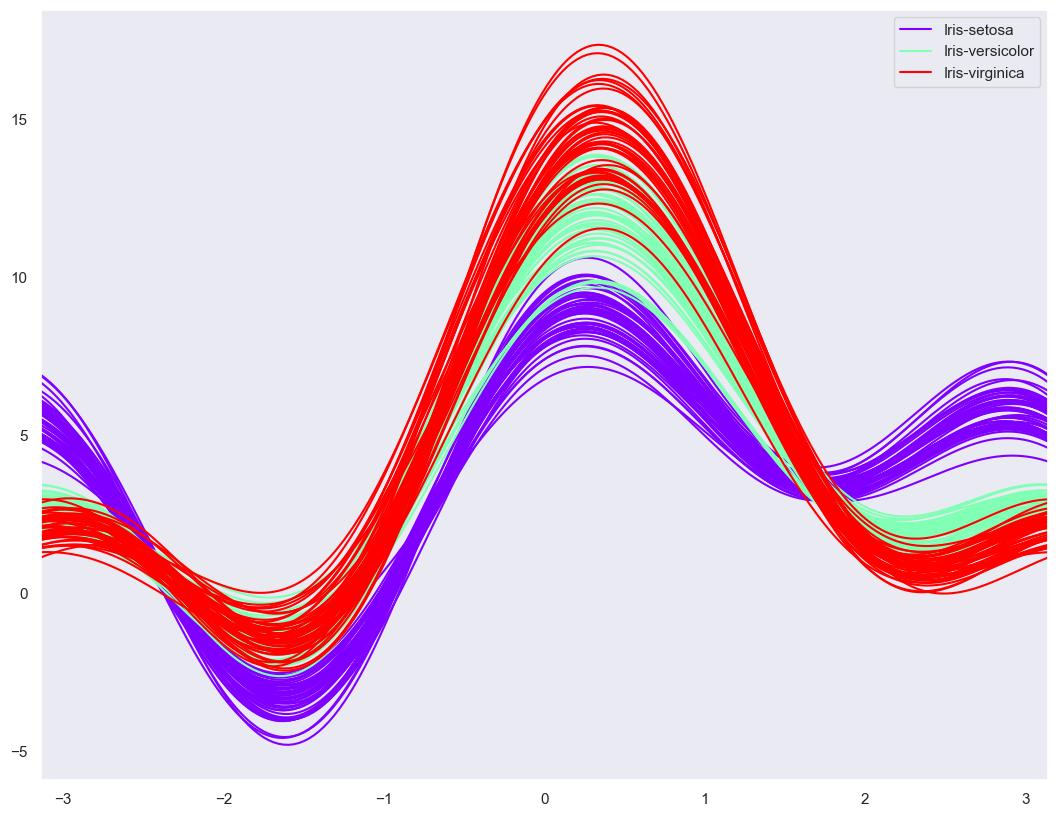

In [33]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(13,10));
andrews_curves(df, "class",colormap='rainbow');

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,6));
parallel_coordinates(df, "class",colormap='cool');

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import numpy as np

In [35]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
X = df.drop(columns='class')
y = df['class']

In [37]:
X.to_csv("Iris_dataset.csv", index=False)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 667
                                                    )

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

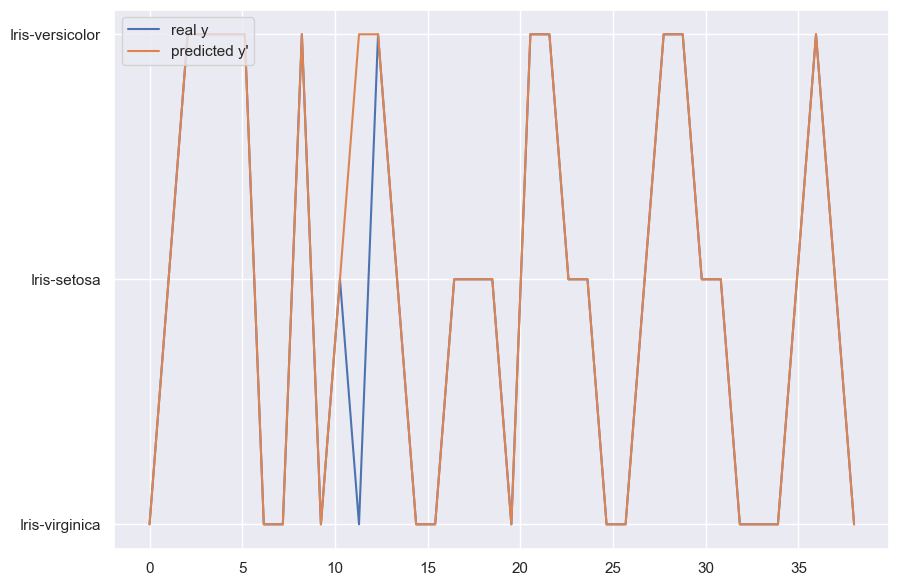

In [41]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2)

In [42]:
joblib.dump(model, "Classification_iris.pkl")

['Classification_iris.pkl']

In [43]:
acc = accuracy_score(y_test, y_pred)
print(f"l'accuracy totale è: {round(acc,2)*100}%")

l'accuracy totale è: 97.0%


Text(110.44999999999997, 0.5, 'Predicted Label')

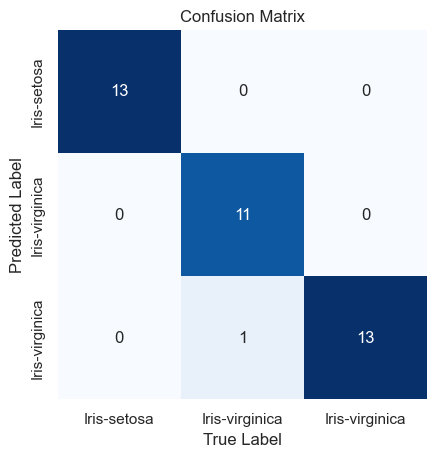

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['Iris-setosa', 'Iris-virginica','Iris-virginica']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')